In [339]:
import pandas as pd
import numpy as np

In [340]:
df = pd.read_csv('cleaned_data.csv')

In [341]:
df.head(2)

,title,rated,released,runtime,director,writer,actors,plot,language,country,...,boxoffice,response,genre,star,budget,gross,year,internet_movie_database_rating,rotten_tomato_rating,metacritic_rating
0,Inception,PG-13,2010-07-16,148,Christopher Nolan,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",A thief who steals corporate secrets through t...,"English, Japanese, French","United Kingdom, United States",...,292576195.0,True,Action,Leonardo DiCaprio,160000000.0,836836967.0,2010,8.8,87.0,74.0
1,Iron Man 2,PG-13,2010-05-07,124,Jon Favreau,"Justin Theroux, Stan Lee, Don Heck","Robert Downey Jr., Mickey Rourke, Gwyneth Paltrow",With the world now aware of his identity as Ir...,"English, French, Russian",United States,...,312433331.0,True,Action,Robert Downey Jr.,200000000.0,623933331.0,2010,7.0,72.0,57.0


In [342]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1774 entries, 0 to 1773
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   title                           1774 non-null   object 
 1   rated                           1753 non-null   object 
 2   released                        1774 non-null   object 
 3   runtime                         1774 non-null   int64  
 4   director                        1766 non-null   object 
 5   writer                          1771 non-null   object 
 6   actors                          1774 non-null   object 
 7   plot                            1774 non-null   object 
 8   language                        1771 non-null   object 
 9   country                         1773 non-null   object 
 10  awards                          1654 non-null   object 
 11  metascore                       1774 non-null   float64
 12  imdbrating                      17

In [343]:
df["rated"].fillna("NA", inplace = True)
df["director"].fillna("NA", inplace = True)
df["writer"].fillna("NA", inplace = True)
df["language"].fillna("NA", inplace = True)
df["country"].fillna("NA", inplace = True)
df["awards"].fillna("NA", inplace = True)
df["metascore"].fillna(0, inplace = True)
df["dvd"].fillna("NA", inplace = True)
df["boxoffice"].fillna(0, inplace = True)
df["budget"].fillna(0, inplace = True)
df["gross"].fillna(0, inplace = True)


In [344]:
df.isnull().sum()

title                             0
rated                             0
released                          0
runtime                           0
director                          0
writer                            0
actors                            0
plot                              0
language                          0
country                           0
awards                            0
metascore                         0
imdbrating                        0
imdbvotes                         0
dvd                               0
boxoffice                         0
response                          0
genre                             0
star                              0
budget                            0
gross                             0
year                              0
internet_movie_database_rating    0
rotten_tomato_rating              0
metacritic_rating                 0
dtype: int64

## Data Preprocessing for model

### Adding label column based on IMDB Rating (rating(<5): label 0,rating(>=5 and <8):label1,rating(>8):label2

In [345]:
df['label']=''
for index, row in df.iterrows():
    if (row['imdbrating']<5):
        df.loc[index, 'label']=0
    elif (row['imdbrating']>=5)&(row['imdbrating']<=7):
        df.loc[index, 'label']=1
    elif (row['imdbrating']>7):
        df.loc[index, 'label']=2

In [346]:
df['label'].value_counts()

1    1186
2     510
0      78
Name: label, dtype: int64

In [347]:
df['label'].dtype

dtype('O')

In [348]:
df['label']=pd.to_numeric(df['label'])
df['label'].fillna(0,inplace=True)
df['label']=df['label'].astype('int')

In [349]:
df['label']

0       2
1       1
2       2
3       2
4       1
       ..
1769    1
1770    0
1771    0
1772    0
1773    1
Name: label, Length: 1774, dtype: int64

### Dropping Columns not required for the model

In [350]:
df=df.drop(['title','released','plot','awards','metascore','imdbrating' ,'imdbvotes','dvd',
           'boxoffice','response','gross', 'year','internet_movie_database_rating',
           'rotten_tomato_rating','metacritic_rating'],axis=1)                                                 
df.columns

Index(['rated', 'runtime', 'director', 'writer', 'actors', 'language',
       'country', 'genre', 'star', 'budget', 'label'],
      dtype='object')

### Create Function for one hot encoding of writer, actors,language, country columns

In [351]:
def one_hot_encode(column,new_col_names):
    
    for index, row in df.iterrows():
        item_names=str(row[column]).split(',')
        for y in item_names:
            y=y.strip()
            if y in new_col_names:
                df.loc[index, y]=1
        

### One Hot Endcoding: Country

In [352]:
from collections import Counter
# Find most common country names
countries=df['country'].to_list()

country_list=[]

for x in countries:
    
        country_array = str(x).split(',')
        for y in country_array:
            y=y.strip()
            country_list.append(y)
most_common=Counter(country_list).most_common(10)
new_col_names=[]
for item in most_common:
    new_col_names.append(item[0])
    df[item[0]]=""
one_hot_encode('country',new_col_names)

In [353]:
len(df.columns)

21

### One Hot Encoding : Language

In [354]:
languages=df['language'].to_list()

language_list=[]

for x in languages:
    
        language_array = str(x).split(',')
        for y in language_array:
            y=y.strip()
            language_list.append(y)
most_common=Counter(language_list).most_common(15)
new_col_names=[]
for item in most_common:
    new_col_names.append(item[0])
    df[item[0]]=""
one_hot_encode('language',new_col_names)


In [355]:
len(df.columns)

36

### One Hot Encoding :writer

In [356]:
writers=df['writer'].to_list()

writer_list=[]

for x in writers:
    
        writer_array = str(x).split(',')
        for y in writer_array:
            y=y.strip()
            writer_list.append(y)
most_common=Counter(writer_list).most_common(50)
new_col_names=[]
for item in most_common:
    new_col_names.append(item[0])
    df[item[0]]=""
one_hot_encode('writer',new_col_names)

In [357]:
len(df.columns)

86

### One Hot Encoding :actors

In [358]:
actors=df['actors'].to_list()

actor_list=[]

for x in actors:
    
        actor_array = str(x).split(',')
        for y in actor_array:
            y=y.strip()
            actor_list.append(y)
most_common=Counter(actor_list).most_common(50)
new_col_names=[]
for item in most_common:
    new_col_names.append(item[0])
    df[item[0]]=""
one_hot_encode('actors',new_col_names)



In [359]:
len(df.columns)

136

In [360]:
df=df.drop(['country','language','writer','actors'],axis=1)

In [361]:
df.columns

Index(['rated', 'runtime', 'director', 'genre', 'star', 'budget', 'label',
       'United States', 'United Kingdom', 'France',
       ...
       'Jessica Chastain', 'Chris Evans', 'Mark Ruffalo', 'Nicolas Cage',
       'Chloë Grace Moretz', 'Johnny Depp', 'Kristen Stewart', 'Amy Adams',
       'Robert De Niro', 'Chris Pine'],
      dtype='object', length=132)

In [362]:
df.shape

(1774, 132)

In [363]:
df.head(5)

,rated,runtime,director,genre,star,budget,label,United States,United Kingdom,France,...,Jessica Chastain,Chris Evans,Mark Ruffalo,Nicolas Cage,Chloë Grace Moretz,Johnny Depp,Kristen Stewart,Amy Adams,Robert De Niro,Chris Pine
0,PG-13,148,Christopher Nolan,Action,Leonardo DiCaprio,160000000.0,2,1,1,,...,,,,,,,,,,
1,PG-13,124,Jon Favreau,Action,Robert Downey Jr.,200000000.0,1,1,,,...,,,,,,,,,,
2,R,138,Martin Scorsese,Mystery,Leonardo DiCaprio,80000000.0,2,1,,,...,,,1,,,,,,,
3,PG-13,112,Edgar Wright,Action,Michael Cera,60000000.0,2,1,1,,...,,,,,,,,,,
4,PG-13,102,Dennis Dugan,Comedy,Adam Sandler,80000000.0,1,1,,,...,,,,,,,,,,


In [364]:
df.fillna(0,inplace=True)


In [365]:
df.isnull().sum()

rated              0
runtime            0
director           0
genre              0
star               0
                  ..
Johnny Depp        0
Kristen Stewart    0
Amy Adams          0
Robert De Niro     0
Chris Pine         0
Length: 132, dtype: int64

In [366]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1774 entries, 0 to 1773
Columns: 132 entries, rated to Chris Pine
dtypes: float64(1), int64(2), object(129)
memory usage: 1.8+ MB


In [367]:
#df.to_csv('one_hot_encode.csv',index=False)

In [368]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.ensemble import RandomForestClassifier


### Reducing type of rated by merging two or more types in one

In [369]:
df.loc[df['rated']=='TV-MA', 'rated'] = 'R'
df.loc[df['rated']=='NC-17', 'rated'] = 'R'
df.loc[df['rated']=='TV-14', 'rated'] = 'PG-13'
df.loc[df['rated']=='TV-PG', 'rated'] = 'PG'
df.loc[df['rated']=='Unrated', 'rated'] = 'NA'
df.loc[df['rated']=='Not Rated', 'rated'] = 'NA'

In [370]:
df['rated'].value_counts()

R        821
PG-13    602
PG       198
NA       142
G         11
Name: rated, dtype: int64

### One Hot Encoding rated Column

In [372]:
new_col_names=df['rated'].unique()

for rating in new_col_names:
    df[rating]=""
one_hot_encode('rated',new_col_names)


In [373]:
len(df.columns)

137

In [374]:
df=df.drop('rated',axis=1)

In [375]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1774 entries, 0 to 1773
Columns: 136 entries, runtime to G
dtypes: float64(1), int64(2), object(133)
memory usage: 1.8+ MB


### One Hot Encoding Star Columns

In [376]:
stars = df.star.value_counts()
# stars_filter = stars[stars< 2]


In [377]:
stars_replace = stars[stars<5].index.to_list()
for star in stars_replace:
      df['star'] =  df['star'].replace(star,'other')

df['star'].value_counts() 

other                  1197
Mark Wahlberg            13
Steve Carell             12
Liam Neeson              12
Matthew McConaughey      12
                       ... 
Jennifer Aniston          5
Daniel Craig              5
Saoirse Ronan             5
Kevin Hart                5
Daniel Radcliffe          5
Name: star, Length: 82, dtype: int64

In [378]:
len(df['star'].unique())

82

In [379]:
star_dummies=pd.get_dummies(df['star'])

In [380]:
star_dummies

,Aaron Taylor-Johnson,Adam Sandler,Alicia Vikander,Andrew Garfield,Anna Kendrick,Ben Affleck,Ben Stiller,Brad Pitt,Bradley Cooper,Channing Tatum,...,Sylvester Stallone,Taron Egerton,Tom Cruise,Tom Hanks,Tom Hardy,Vin Diesel,Will Ferrell,Will Smith,Zac Efron,other
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1769,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1770,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1771,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1772,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [381]:
df=df.drop('star',axis=1)
df=pd.merge(df, star_dummies, left_index=True, right_index=True)

In [382]:
df.shape

(1774, 217)

### One Hot Encoding Director Column

In [383]:
directors=df.director.value_counts()

In [384]:
directors_replace = directors[directors<5].index.to_list()
for director in directors_replace:
      df['director'] =  df['director'].replace(director,'other')

df['director'].value_counts() 

other                       1620
Ridley Scott                  10
NA                             8
Robert Schwentke               8
Woody Allen                    7
Clint Eastwood                 7
Steven Spielberg               7
Ruben Fleischer                6
Antoine Fuqua                  6
Joe Wright                     5
Peter Berg                     5
Shawn Levy                     5
Chris Buck, Jennifer Lee       5
David Yates                    5
Francis Lawrence               5
Luc Besson                     5
Ron Howard                     5
Jonathan Levine                5
Doug Liman                     5
Paul W.S. Anderson             5
Denis Villeneuve               5
Steven Soderbergh              5
Michael Bay                    5
Daniel Espinosa                5
Brad Peyton                    5
James Wan                      5
Tim Burton                     5
Nicholas Stoller               5
Name: director, dtype: int64

In [385]:
len(df['director'].unique())

28

In [386]:
director_dummies=pd.get_dummies(df['director'])

In [387]:
director_dummies.shape

(1774, 28)

In [388]:
director_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1774 entries, 0 to 1773
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Antoine Fuqua             1774 non-null   uint8
 1   Brad Peyton               1774 non-null   uint8
 2   Chris Buck, Jennifer Lee  1774 non-null   uint8
 3   Clint Eastwood            1774 non-null   uint8
 4   Daniel Espinosa           1774 non-null   uint8
 5   David Yates               1774 non-null   uint8
 6   Denis Villeneuve          1774 non-null   uint8
 7   Doug Liman                1774 non-null   uint8
 8   Francis Lawrence          1774 non-null   uint8
 9   James Wan                 1774 non-null   uint8
 10  Joe Wright                1774 non-null   uint8
 11  Jonathan Levine           1774 non-null   uint8
 12  Luc Besson                1774 non-null   uint8
 13  Michael Bay               1774 non-null   uint8
 14  NA                        1774 non-null 

In [389]:
df=df.drop('director',axis=1)


In [390]:
df=pd.merge(df, director_dummies, left_index=True, right_index=True)
df.shape

(1774, 244)

### One hot encode genre column

In [391]:
df['genre'].value_counts()

Action       504
Comedy       367
Drama        357
Biography    143
Animation    120
Crime         91
Adventure     88
Horror        84
Fantasy        6
Mystery        4
Thriller       3
Musical        2
Romance        2
Sport          1
Sci-Fi         1
Family         1
Name: genre, dtype: int64

In [392]:
genre_dummies=pd.get_dummies(df['genre'])

In [393]:
df=df.drop('genre',axis=1)

In [394]:
df=pd.merge(df, genre_dummies, left_index=True, right_index=True)
df.shape

(1774, 259)

In [395]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1774 entries, 0 to 1773
Columns: 259 entries, runtime to Thriller
dtypes: float64(1), int64(2), object(130), uint8(126)
memory usage: 2.0+ MB


In [399]:
for col in df.columns:
    df[col]=pd.to_numeric(df[col])
    
# pd.to_numeric(df['label'])

In [400]:
df.isnull().sum()

runtime              0
budget               0
label                0
United States      289
United Kingdom    1394
                  ... 
Mystery              0
Romance              0
Sci-Fi               0
Sport                0
Thriller             0
Length: 259, dtype: int64

In [402]:
df=df.fillna(0)

In [403]:
df.isnull().sum()

runtime           0
budget            0
label             0
United States     0
United Kingdom    0
                 ..
Mystery           0
Romance           0
Sci-Fi            0
Sport             0
Thriller          0
Length: 259, dtype: int64

In [404]:
### expected new no. of cols after pd.get_dummies from these four cols=5+82+82+16=185

### Splitting Feature and Target Columns

In [405]:
X=df.drop('label',axis=1)
y=df['label']

In [406]:
# X=pd.get_dummies(df2)
X.shape

(1774, 258)

In [407]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=1)

In [408]:
scaler=StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

### Trying RandomForest Classifier

In [409]:
model=RandomForestClassifier (random_state=5,n_estimators=500,max_depth=11,min_samples_split=5)
model.fit(X_train_scaled,y_train)

RandomForestClassifier(max_depth=11, min_samples_split=5, n_estimators=500,
                       random_state=5)

In [410]:
training_score = model.score(X_train_scaled, y_train)
testing_score = model.score(X_test_scaled, y_test)

In [411]:
print(f"training_score:{training_score},testing_score:{testing_score}")

training_score:0.765511684125705,testing_score:0.7223264540337712


In [412]:
# from sklearn.model_selection import GridSearchCV

In [413]:
# model=RandomForestClassifier()
# param_grid={'n_estimators' :np.arange(50,500,50),
#             'max_depth': np.arange(3,20,2),
#             'max_leaf_nodes': np.arange(3,20,2)
# }
# grid_clf=GridSearchCV(model,param_grid)

In [414]:
# grid_clf.fit(X_train_scaled,y_train)

In [415]:
# print(grid_clf.best_params_)

In [416]:
# print(grid_clf.best_score_)

### Trying SVC

In [417]:
from sklearn.svm import SVC

In [418]:
model=SVC(kernel='rbf',C=9,gamma=.0001)
model.fit(X_train_scaled,y_train)
#‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’

SVC(C=9, gamma=0.0001)

In [419]:
training_score = model.score(X_train_scaled, y_train)
testing_score = model.score(X_test_scaled, y_test)

In [420]:
print(f"training_score:{training_score},testing_score:{testing_score}")

training_score:0.734085414987913,testing_score:0.6904315196998124


In [746]:
model=SVC()
param_grid={'C':[1,5,10,50],
            'gamma':[0.0001,0.0005,0.001,0.005],
            'kernel':['linear','poly','rbf','sigmoid']
}
grid_clf=GridSearchCV(model,param_grid)

In [747]:
grid_clf.fit(X_train_scaled,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 5, 10, 50],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [748]:
print(grid_clf.best_params_)

{'C': 10, 'gamma': 0.0001, 'kernel': 'sigmoid'}


In [749]:
print(grid_clf.best_score_)

0.7018752429071123


### Trying K-Nearestneighbors

In [421]:
from sklearn.neighbors import KNeighborsClassifier

In [422]:
train_scores=[]
test_scores=[]

In [423]:
for k in range (1,20,2):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled,y_train)
    train_score=knn.score(X_train_scaled,y_train)
    test_score=knn.score(X_test_scaled,y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)

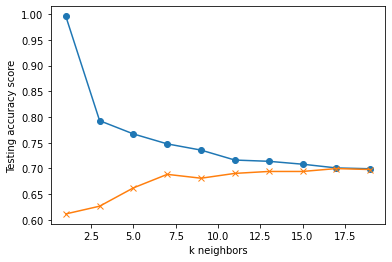

In [424]:
import matplotlib.pyplot as plt
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy score")
plt.show()

In [425]:
knn=KNeighborsClassifier(n_neighbors=18)
knn.fit(X_train_scaled,y_train)


KNeighborsClassifier(n_neighbors=18)

In [426]:
training_score = knn.score(X_train_scaled, y_train)
testing_score = knn.score(X_test_scaled, y_test)

In [427]:
print(f"training_score:{training_score},testing_score:{testing_score}")

training_score:0.6978243352135375,testing_score:0.7091932457786116


### Trying other ensemble methods

In [428]:
from sklearn.ensemble import ExtraTreesClassifier, AdaBoostClassifier

### ExtraTreesClassifier

In [429]:
model=ExtraTreesClassifier()
model.fit(X_train_scaled,y_train)

ExtraTreesClassifier()

In [430]:
training_score = model.score(X_train_scaled, y_train)
testing_score = model.score(X_test_scaled, y_test)

In [431]:
print(f"training_score:{training_score},testing_score:{testing_score}")

training_score:0.9959709911361805,testing_score:0.6622889305816135


### AdaBoostClassifier

In [432]:
model=AdaBoostClassifier()
model.fit(X_train_scaled,y_train)

AdaBoostClassifier()

In [433]:
training_score = model.score(X_train_scaled, y_train)
testing_score = model.score(X_test_scaled, y_test)

In [434]:
print(f"training_score:{training_score},testing_score:{testing_score}")

training_score:0.6946011281224819,testing_score:0.6810506566604128
